EDA DE REVIEWS

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
df_reviews = pd.read_csv('df_reviewfinal.csv', encoding='utf-8')
df_reviews.head()

,posted,item_id,helpful,recommend,user_id,sentiment_analysis
0,2011-11-05,1250,No ratings yet,1.0,76561197970982479,1
1,2011-07-15,22200,No ratings yet,1.0,76561197970982479,2
2,2011-04-21,43110,No ratings yet,1.0,76561197970982479,1
3,2014-06-24,251610,15 of 20 people (75%) found this review helpful,1.0,js41637,1
4,2013-09-08,227300,0 of 1 people (0%) found this review helpful,1.0,js41637,1


In [59]:
# Obtén información sobre los tipos de datos y los valores nulos
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
info = df_reviews.dtypes.to_frame(name='Tipo de Datos')
info['Valores Nulos'] = df_reviews.isnull().sum()
info['Valores No Nulos'] = df_reviews.notnull().sum()

# Imprime la información
print(info)


La cantidad de registros que hay son: 49186
                   Tipo de Datos  Valores Nulos  Valores No Nulos
posted                    object              0             49186
item_id                    int64              0             49186
helpful                   object              0             49186
recommend                float64              0             49186
user_id                   object              0             49186
sentiment_analysis         int64              0             49186


In [60]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  0.0            1268    2.577969
                   1.0            2935    5.967145
1                  0.0            3295    6.699061
                   1.0           26591   54.062132
2                  0.0             441    0.896597
                   1.0           14656   29.797097

In [61]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 22795


In [62]:
print(f'La cantidad de fechas en formato inválido son: {len(df_reviews[df_reviews["posted"]=="Formato inválido"])}')

La cantidad de fechas en formato inválido son: 0


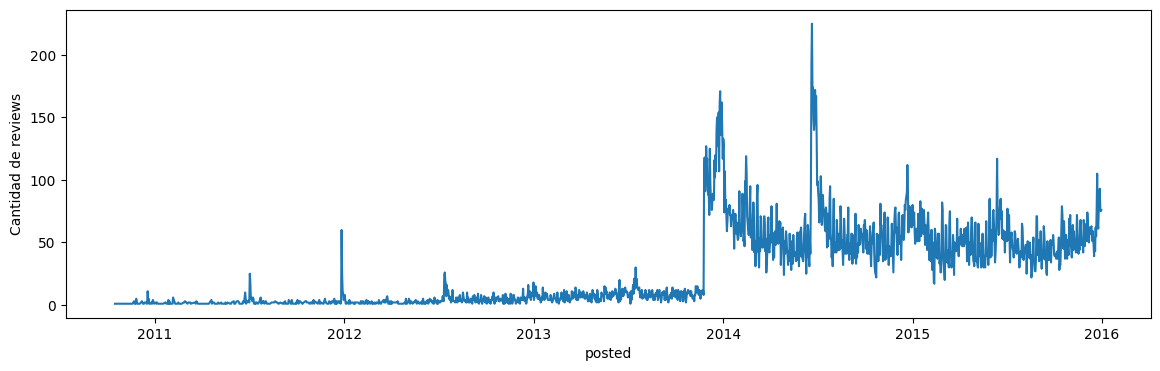

In [63]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = df_reviews[df_reviews["posted"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Convierte a formato fecha
df["posted"] = pd.to_datetime(df["posted"])
# Calcula la cantidad de review por fecha
df_counts = df.groupby("posted").count()

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="posted", y="recommend")
plt.ylabel('Cantidad de reviews')
plt.show()

In [64]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='recommend', ascending=False)['recommend'][:5]

Días de cantidad pico de reviews


posted
2014-06-21    225
2014-06-20    193
2014-06-23    174
2014-06-27    172
2013-12-26    171
Name: recommend, dtype: int64

EDA DE OUTPUTGAMES

In [65]:
df_games = pd.read_csv('output_desanidado.csv', encoding='utf-8')
df_games.head()

,genres,release_date,reviews_url,item_id,developer,price,release_year
0,Action,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018
1,Casual,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018
2,Indie,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018
3,Simulation,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018
4,Strategy,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018


In [66]:

# Obtén información sobre los tipos de datos y los valores nulos
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
info = df_reviews.dtypes.to_frame(name='Tipo de Datos')
info['Valores Nulos'] = df_games.isnull().sum()
info['Valores No Nulos'] = df_games.notnull().sum()

# Imprime la información
print(info)


La cantidad de registros que hay son: 70702
                   Tipo de Datos  Valores Nulos  Valores No Nulos
posted                    object            NaN               NaN
item_id                    int64            0.0           70702.0
helpful                   object            NaN               NaN
recommend                float64            NaN               NaN
user_id                   object            NaN               NaN
sentiment_analysis         int64            NaN               NaN


In [67]:
total_juegos = len(df_games['item_id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28547


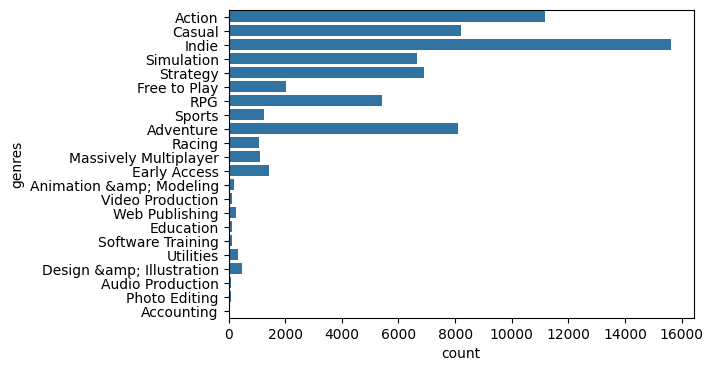

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()


In [69]:

# Calcular la cantidad de cada género
cantidad_generos = df_games['genres'].value_counts()

# Calcular el porcentaje de cada género
porcentaje_generos = (cantidad_generos / len(df)) * 100

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({'Cantidad': cantidad_generos, 'Porcentaje': porcentaje_generos})

# Mostrar los resultados
print(resultados)



                           Cantidad  Porcentaje
genres                                         
Indie                         15634   31.785467
Action                        11178   22.725979
Casual                         8211   16.693775
Adventure                      8111   16.490465
Strategy                       6893   14.014150
Simulation                     6648   13.516041
RPG                            5412   11.003131
Free to Play                   2013    4.092628
Early Access                   1419    2.884967
Sports                         1245    2.531208
Massively Multiplayer          1096    2.228276
Racing                         1077    2.189647
Design &amp; Illustration       460    0.935225
Utilities                       335    0.681088
Web Publishing                  268    0.544870
Animation &amp; Modeling        183    0.372057
Education                       125    0.254137
Video Production                114    0.231773
Software Training               105    0

In [70]:
# Calcular la cantidad de cada género
cantidad_year = df_games['release_year'].value_counts()

# Calcular el porcentaje de cada género
porcentaje_year = (cantidad_year / len(df)) * 100

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({'Cantidad': cantidad_year, 'Porcentaje': porcentaje_year})

# Mostrar los resultados
print(resultados)

              Cantidad  Porcentaje
release_year                      
2017             24968   50.762412
2016             17667   35.918757
2015             12256   24.917659
2014              6341   12.891880
2013              3016    6.131826
2012              2106    4.281706
2011               986    2.004635
2010               653    1.327614
2009               486    0.988086
2008               332    0.674989
2018               312    0.634327
2007               259    0.526573
2006               217    0.441182
2005               139    0.282601
2003               118    0.239906
2001               109    0.221608
2004                92    0.187045
1999                80    0.162648
1998                75    0.152482
1997                64    0.130118
2002                62    0.126052
1996                56    0.113854
2000                55    0.111820
1994                52    0.105721
1995                49    0.099622
1993                40    0.081324
1992                

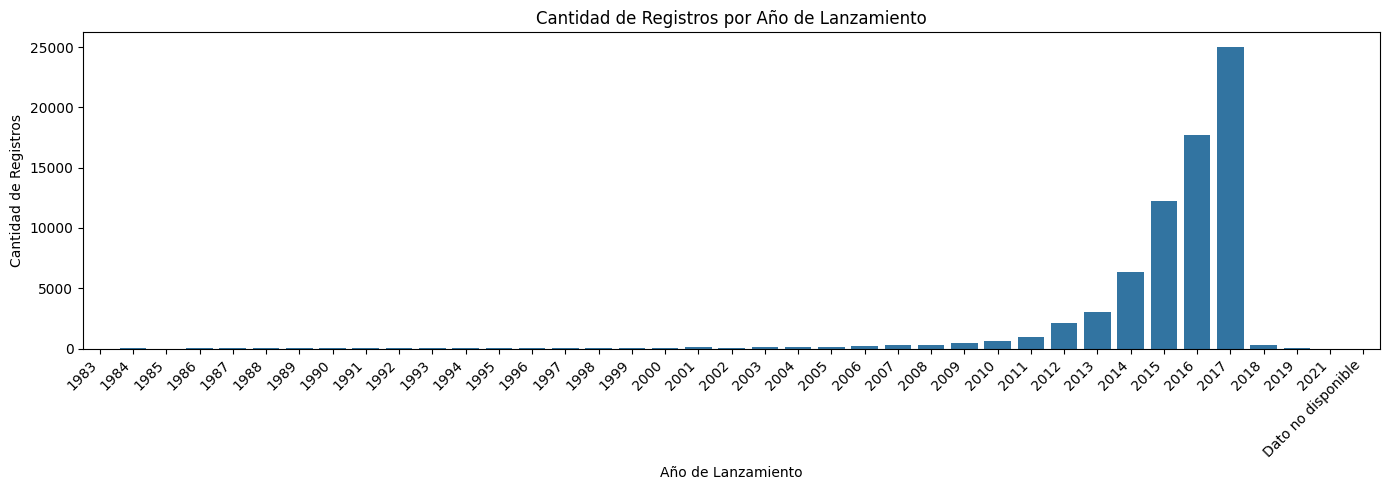

In [71]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['release_year'].value_counts()
conteo_anios.index = conteo_anios.index.astype(str)


# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

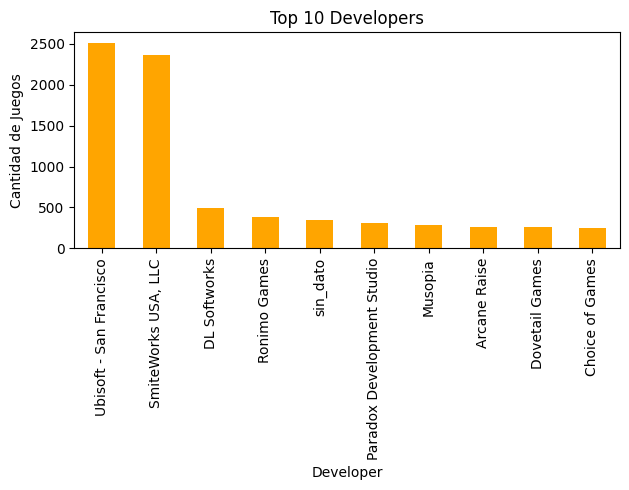

In [72]:
# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

EDA DE ITEMS

In [73]:
df_items = pd.read_csv('df_itemsdesanidado2.csv', encoding='utf-8')
df_items.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,user_url,items_count
0,10,Counter-Strike,6,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
1,20,Team Fortress Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
2,30,Day of Defeat,7,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
3,40,Deathmatch Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
4,50,Half-Life: Opposing Force,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277


In [74]:
# Obtén información sobre los tipos de datos y los valores nulos
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
info = df_items.dtypes.to_frame(name='Tipo de Datos')
info['Valores Nulos'] = df_items.isnull().sum()
info['Valores No Nulos'] = df_items.notnull().sum()

# Imprime la información
print(info)


La cantidad de registros que hay son: 5153209
                 Tipo de Datos  Valores Nulos  Valores No Nulos
item_id                  int64              0           5153209
item_name               object              0           5153209
playtime_forever         int64              0           5153209
playtime_2weeks          int64              0           5153209
user_id                 object              0           5153209
user_url                object              0           5153209
items_count              int64              0           5153209


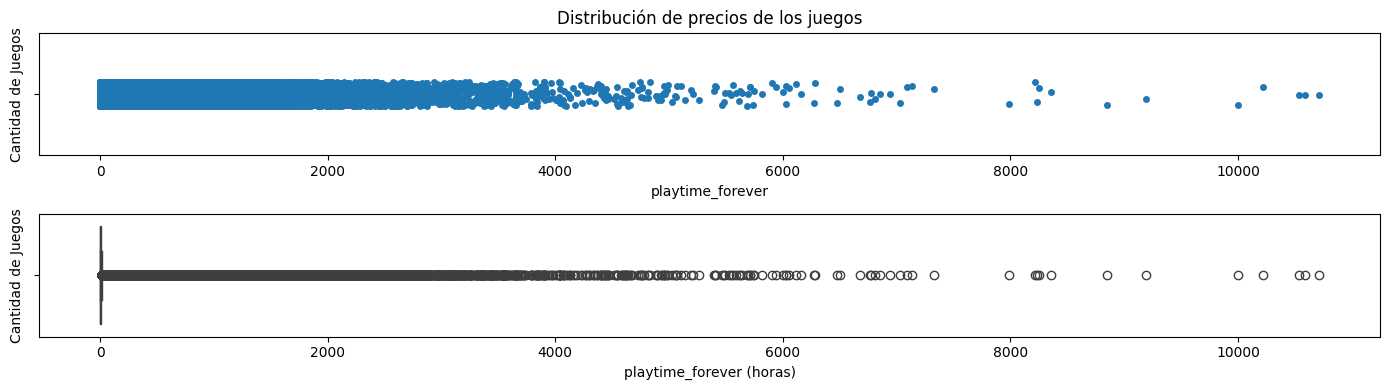

In [75]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


In [76]:
estadisticas = df_items['items_count'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')


El precio medio (mediana) de los juegos es de: 138.0
El precio promedio (mean) de los juegos es de: 314.72
El 75% de los juegos tienen un precio menor de: 276.0


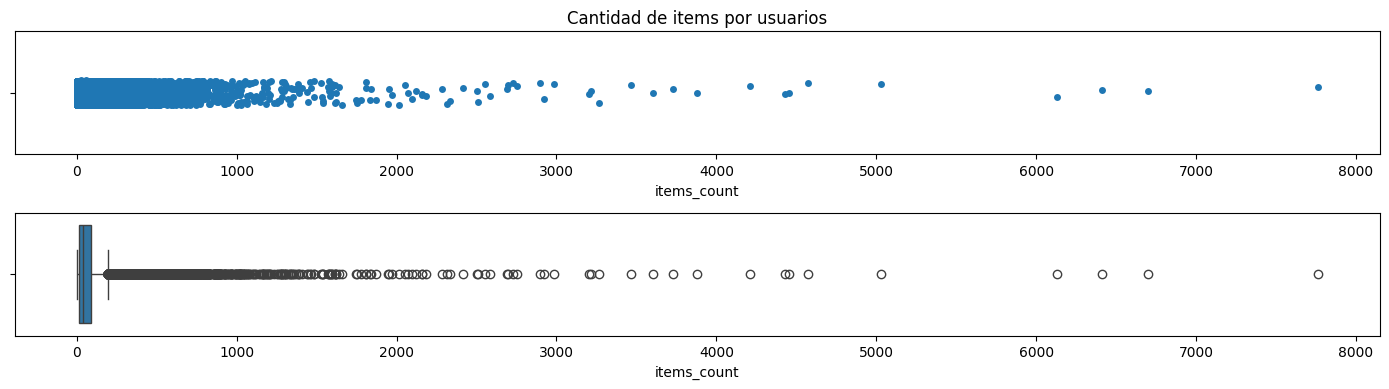

In [77]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


In [78]:
estadisticas = items_count_user['items_count'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')


El precio medio (mediana) de los juegos es de: 40.0
El precio promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un precio menor de: 87.0


<Figure size 1400x500 with 0 Axes>

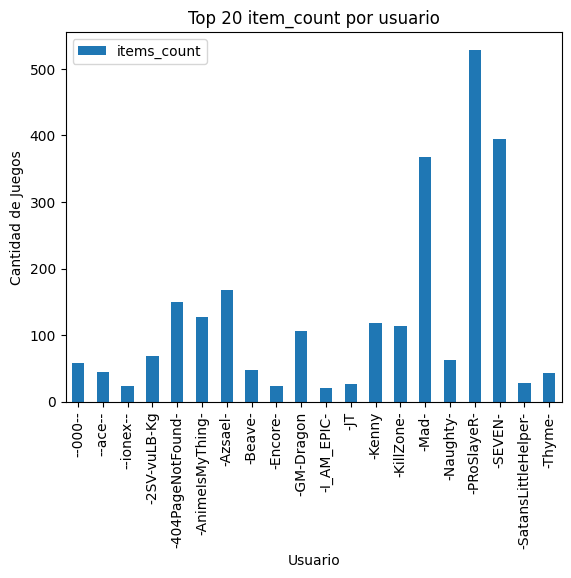

In [79]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

Variables para modelo de recomendacion

In [80]:
df_reviews = pd.read_csv('df_reviewfinal.csv', encoding='utf-8')
df_items = pd.read_csv('df_itemsdesanidado2.csv', encoding='utf-8')

In [81]:
df_reviews.head(2)

,posted,item_id,helpful,recommend,user_id,sentiment_analysis
0,2011-11-05,1250,No ratings yet,1.0,76561197970982479,1
1,2011-07-15,22200,No ratings yet,1.0,76561197970982479,2


In [82]:
df_items.head(2)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,user_url,items_count
0,10,Counter-Strike,6,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
1,20,Team Fortress Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277


In [83]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if row["sentiment_analysis"] == 0 and not row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["recommend"]:
        return 5
    else:
        return None

In [84]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)


,posted,item_id,helpful,recommend,user_id,sentiment_analysis,rating
0,2011-11-05,1250,No ratings yet,1.0,76561197970982479,1,3
1,2011-07-15,22200,No ratings yet,1.0,76561197970982479,2,5


In [85]:
df1 = df_reviews[['user_id', 'item_id', 'rating']]
df1.head(2)

,user_id,item_id,rating
0,76561197970982479,1250,3
1,76561197970982479,22200,5


In [86]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10978 juegos


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


In [87]:
df = df1.merge(df2, left_on="item_id", right_on="item_id", how='left')
df

,user_id,item_id,rating,item_name
0,76561197970982479,1250,3,Killing Floor
1,76561197970982479,22200,5,Zeno Clash
2,76561197970982479,43110,3,Metro 2033
3,js41637,251610,3,Barbie™ Dreamhouse Party™
4,js41637,227300,3,Euro Truck Simulator 2
...,...,...,...,...
49181,wayfeng,730,3,Counter-Strike: Global Offensive
49182,76561198251004808,253980,5,Enclave
49183,72947282842,730,1,Counter-Strike: Global Offensive
49184,ApxLGhost,730,3,Counter-Strike: Global Offensive


In [88]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['item_id'].unique())} juegos con reviews pero que no estan en `df_reviews`")
sin_juegos

Hay un total de 256 juegos con reviews pero que no estan en `df_reviews`


,user_id,item_id,rating,item_name
27,76561198089393905,440,3,NaN
35,DJKamBer,570,5,NaN
39,DJKamBer,440,3,NaN
41,Rainbow-Dashie,440,3,NaN
46,devvonst,440,5,NaN
...,...,...,...,...
49139,BBiiiirr,440,3,NaN
49152,76561198209894493,440,3,NaN
49171,01shan,440,3,NaN
49175,76561198236893796,440,3,NaN


In [89]:
# Se borran los nulos
df = df.dropna(subset=['item_id'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')


Quedan 49186 registros


In [90]:
df = df[['user_id', 'item_name', 'rating']]
df.head(3)

,user_id,item_name,rating
0,76561197970982479,Killing Floor,3
1,76561197970982479,Zeno Clash,5
2,76561197970982479,Metro 2033,3


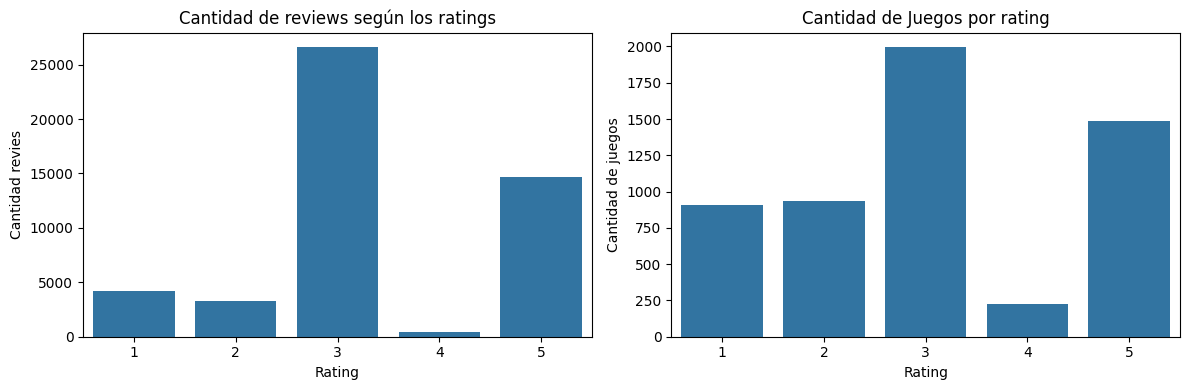

In [91]:
# Agrupa las calificaciones por rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0])
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Cantidad revies')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1])
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [92]:
# Utilizar la función groupby para agrupar las reseñas por rating y luego contar las reseñas en cada grupo
review_counts = df['rating'].value_counts()

# Mostrar los resultados
print(review_counts)


rating
3    26591
5    14656
1     4203
2     3295
4      441
Name: count, dtype: int64


In [93]:


# Utilizar la función groupby para agrupar las reseñas por rating y luego contar las reseñas en cada grupo
review_counts = df['rating'].value_counts()

# Calcular el porcentaje de reseñas
review_percentages = (review_counts / len(df)) * 100

# Crear un DataFrame con las cantidades y porcentajes
result = pd.DataFrame({'Cantidad': review_counts, 'Porcentaje': review_percentages})

# Mostrar los resultados
print(result)


        Cantidad  Porcentaje
rating                      
3          26591   54.062132
5          14656   29.797097
1           4203    8.545114
2           3295    6.699061
4            441    0.896597


In [94]:
# Agrupar por la columna "rating" y contar la cantidad de juegos en cada grupo
game_counts = df1.groupby('rating')['item_id'].count()

# Crear un nuevo DataFrame con las cantidades
result = pd.DataFrame({'item_id': game_counts})

# Mostrar los resultados
print(result)


        item_id
rating         
1          4203
2          3295
3         26591
4           441
5         14656


In [95]:
df.to_csv('datos/recomendacion.csv', index=False, encoding='utf-8')
print(f"Se guardado como 'datos/recomendacion.csv'")

Se guardado como 'datos/recomendacion.csv'
